In [63]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [64]:
concatenated_df= pd.read_csv('Dataset/Concat_dataframe.csv')
concatenated_df

,HCHO reading,Location,Current Date,Next Date,Year,Month
0,0.000263,"Deniyaya, Matara",2019-01-01,2019-01-02,2019,1
1,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02,2019,1
2,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019,1
3,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03,2019,1
4,0.000006,Nuwara Eliya Proper,2019-01-02,2019-01-03,2019,1
...,...,...,...,...,...,...
12774,0.000158,Kurunegala Proper,2023-12-30,2023-12-31,2023,12
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31,2023,12
12776,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01,2023,12
12777,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,2023,12


In [65]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(concatenated_df['HCHO reading'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Based on the p-value, decide on stationarity
if adf_test[1] > 0.05:
    print("The series is likely non-stationary and may need differencing.")
else:
    print("The series is likely stationary.")


ADF Statistic: -11.898903
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is likely stationary.


In [66]:
# Convert 'Current Date' to datetime and set as index
concatenated_df['Current Date'] = pd.to_datetime(concatenated_df['Current Date'])
concatenated_df.set_index('Current Date', inplace=True)

# Output the first few rows and the index to verify changes
df_head_after = concatenated_df.head()
df_index_info = concatenated_df.index

df_head_after, df_index_info

(              HCHO reading             Location   Next Date  Year  Month
 Current Date                                                            
 2019-01-01        0.000263     Deniyaya, Matara  2019-01-02  2019      1
 2019-01-01        0.000263  Nuwara Eliya Proper  2019-01-02  2019      1
 2019-01-02        0.000263       Colombo Proper  2019-01-03  2019      1
 2019-01-02        0.000006     Deniyaya, Matara  2019-01-03  2019      1
 2019-01-02        0.000006  Nuwara Eliya Proper  2019-01-03  2019      1,
 DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-02', '2019-01-02',
                '2019-01-02', '2019-01-03', '2019-01-03', '2019-01-03',
                '2019-01-04', '2019-01-04',
                ...
                '2023-12-28', '2023-12-29', '2023-12-29', '2023-12-29',
                '2023-12-30', '2023-12-30', '2023-12-30', '2023-12-31',
                '2023-12-31', '2023-12-31'],
               dtype='datetime64[ns]', name='Current Date', length=12779, freq=None)

## Colombo Proper

In [67]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Colombo Proper']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.6282314999775265
p-value: 0.00011454673580869861


In [68]:
colombo_ds = concatenated_df[concatenated_df['Location'] == 'Colombo Proper']['HCHO reading']

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(colombo_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14446.370
Date:                Sat, 20 Apr 2024   AIC                         -28884.740
Time:                        23:49:51   BIC                         -28862.703
Sample:                    01-02-2019   HQIC                        -28876.611
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.22e-06     22.913      0.000       0.000       0.000
ar.L1          0.8600   2.22e-10   3.87e+09      0.000       0.860       0.860
ma.L1         -0.5738   8.49e-11  -6.75e+09      0.000      -0.574      -0.574
sigma2      7.724e-09   2.37e-10     32.567      0.000    7.26e-09    8.19e-09
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                17.73
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.07
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.74e+25. Standard errors may be unstable.
"""

In [70]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000129
2024-01-02    0.000131
2024-01-03    0.000133
2024-01-04    0.000134
2024-01-05    0.000135
2024-01-06    0.000136
2024-01-07    0.000137
2024-01-08    0.000138
2024-01-09    0.000139
2024-01-10    0.000139
Freq: D, Name: predicted_mean, dtype: float64

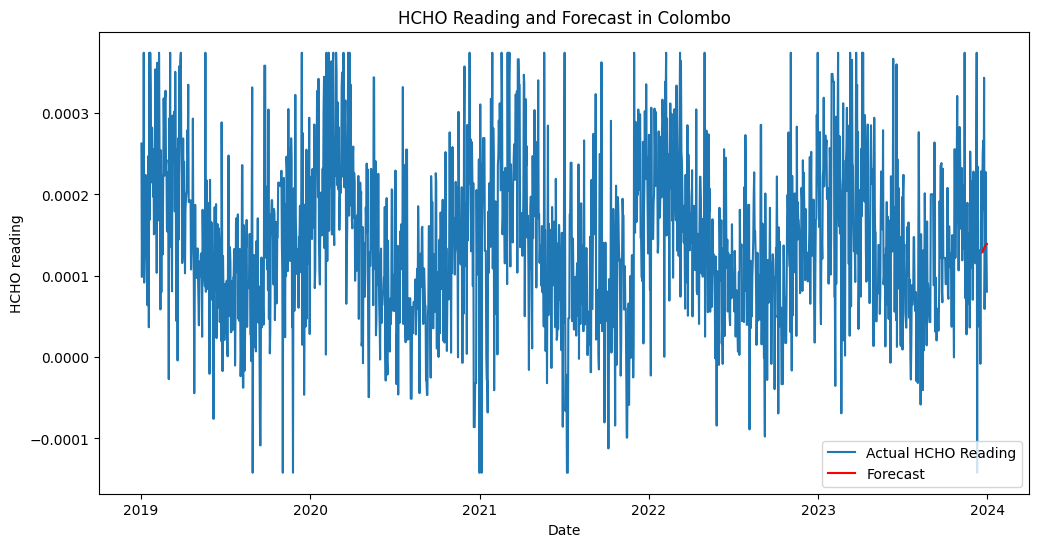

In [71]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(colombo_ds, label='Actual HCHO Reading')
plt.plot(colombo_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Colombo')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.legend()
plt.show()

In [72]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(colombo_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 9.644104497416439e-09


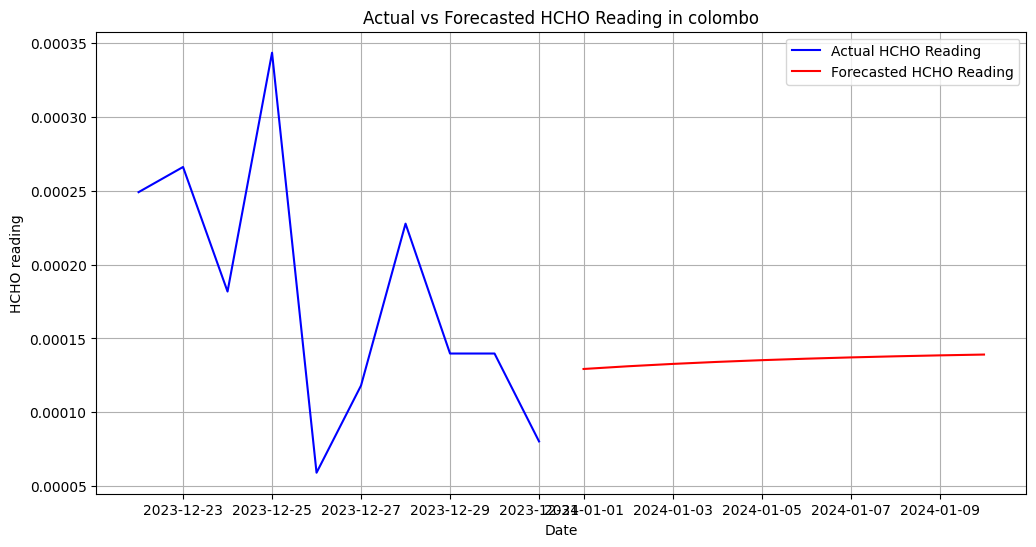

In [73]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(colombo_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in colombo')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Kurunegala Proper

In [74]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Kurunegala Proper']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.863417876246653
p-value: 1.5811908110872901e-09


In [75]:
kurunegala_ds = concatenated_df[concatenated_df['Location'] == 'Kurunegala Proper']['HCHO reading']

In [76]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(kurunegala_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14586.029
Date:                Sat, 20 Apr 2024   AIC                         -29164.057
Time:                        23:49:52   BIC                         -29142.018
Sample:                    01-01-2019   HQIC                        -29155.928
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.72e-06     46.402      0.000       0.000       0.000
ar.L1          0.4439    3.4e-11    1.3e+10      0.000       0.444       0.444
ma.L1         -0.2177   2.95e-11  -7.37e+09      0.000      -0.218      -0.218
sigma2      6.759e-09    2.3e-10     29.422      0.000    6.31e-09    7.21e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.46
Prob(Q):                              0.92   Prob(JB):                         0.04
Heteroskedasticity (H):               0.92   Skew:                             0.14
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+26. Standard errors may be unstable.
"""

In [77]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000114
2024-01-02    0.000121
2024-01-03    0.000124
2024-01-04    0.000125
2024-01-05    0.000126
2024-01-06    0.000126
2024-01-07    0.000126
2024-01-08    0.000126
2024-01-09    0.000126
2024-01-10    0.000126
Freq: D, Name: predicted_mean, dtype: float64

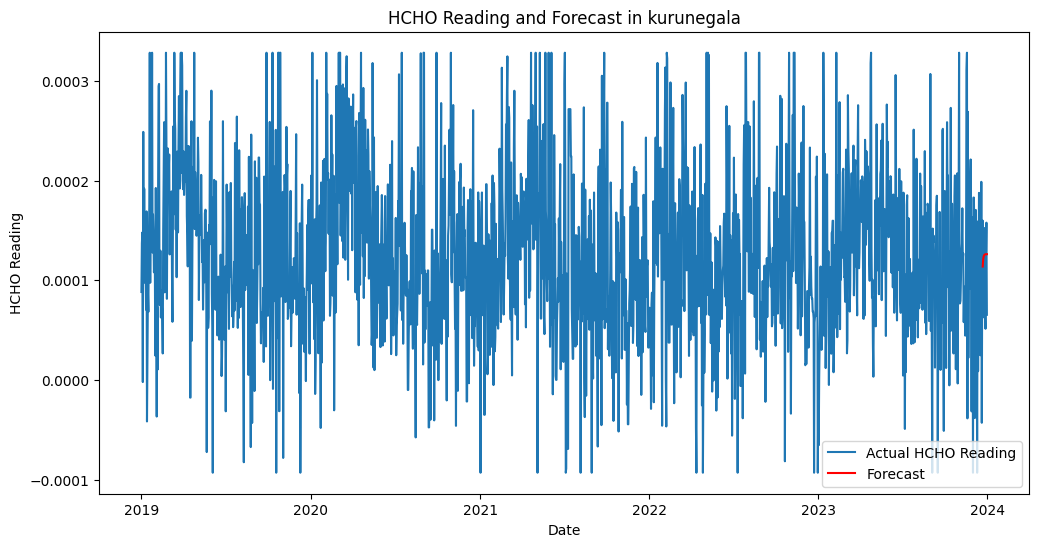

In [78]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(kurunegala_ds, label='Actual HCHO Reading')
plt.plot(kurunegala_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in kurunegala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [79]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(kurunegala_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.132444756276378e-09


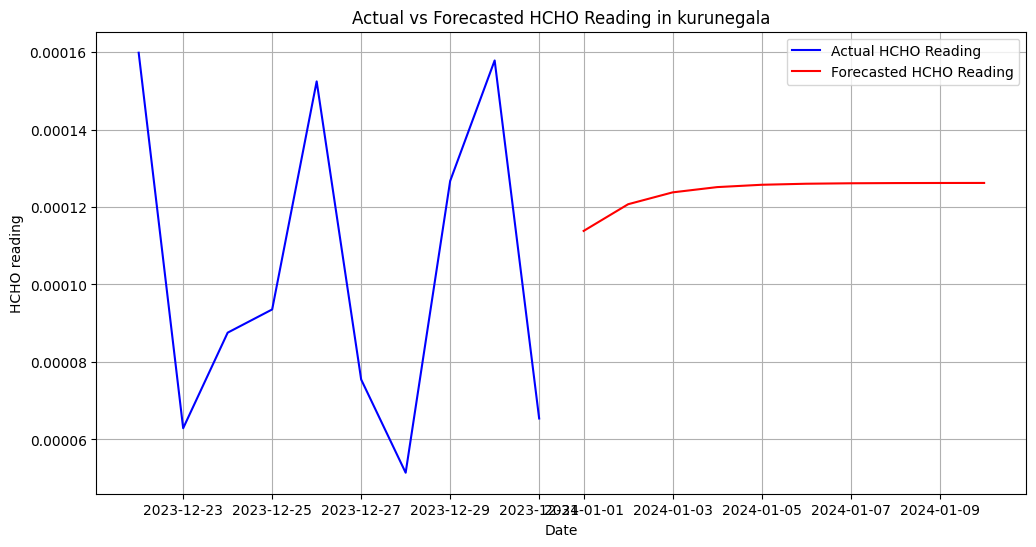

In [80]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(kurunegala_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in kurunegala')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Monaragala

In [81]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Bibile, Monaragala']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.76199575741776
p-value: 5.64423621804997e-07


In [82]:
monaragala_ds = concatenated_df[concatenated_df['Location'] == 'Bibile, Monaragala']['HCHO reading']

In [83]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(monaragala_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14547.849
Date:                Sat, 20 Apr 2024   AIC                         -29087.698
Time:                        23:49:53   BIC                         -29065.661
Sample:                    01-02-2019   HQIC                        -29079.569
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.89e-06     41.430      0.000       0.000       0.000
ar.L1          0.5507   2.41e-11   2.28e+10      0.000       0.551       0.551
ma.L1         -0.3414    1.9e-11  -1.79e+10      0.000      -0.341      -0.341
sigma2      6.976e-09   2.34e-10     29.817      0.000    6.52e-09    7.44e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                12.44
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.18
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+26. Standard errors may be unstable.
"""

In [84]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000117
2024-01-02    0.000118
2024-01-03    0.000119
2024-01-04    0.000119
2024-01-05    0.000119
2024-01-06    0.000120
2024-01-07    0.000120
2024-01-08    0.000120
2024-01-09    0.000120
2024-01-10    0.000120
Freq: D, Name: predicted_mean, dtype: float64

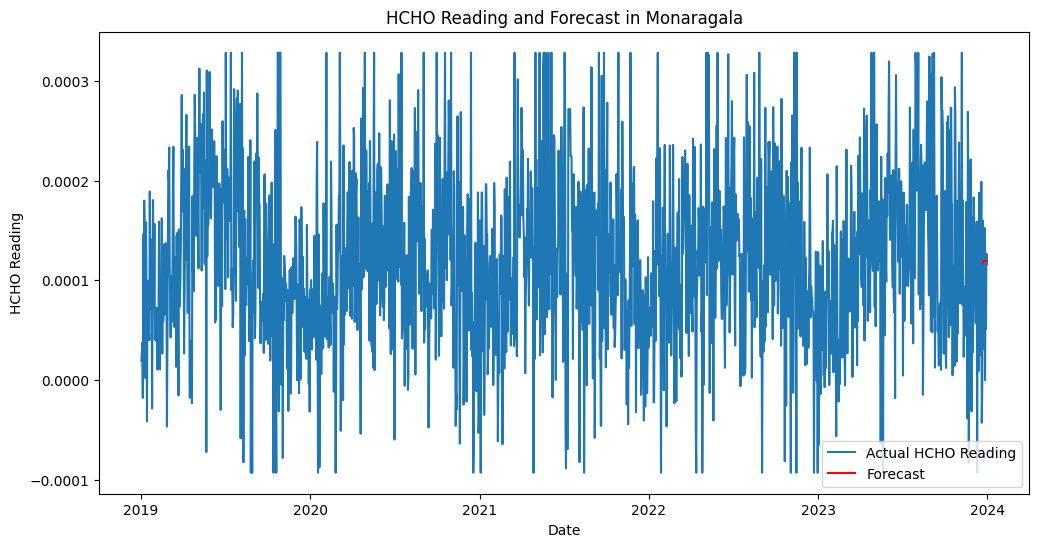

In [85]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monaragala_ds, label='Actual HCHO Reading')
plt.plot(monaragala_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [86]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(monaragala_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 3.564409949806091e-09


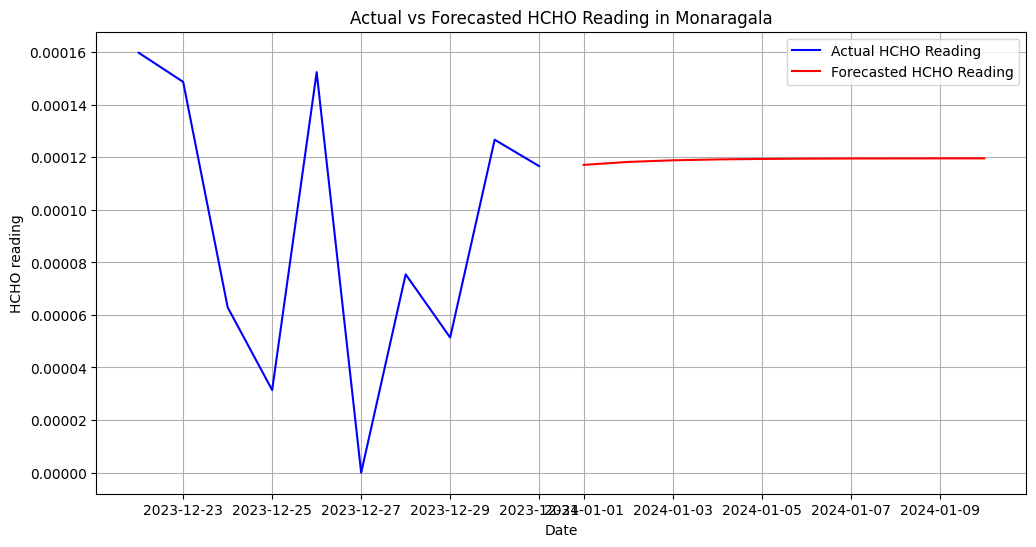

In [87]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monaragala_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Monaragala')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Deniyaya, Matara 

In [88]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Deniyaya, Matara']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.45517707193433
p-value: 5.536582398281918e-11


In [89]:
matara_ds = concatenated_df[concatenated_df['Location'] == 'Deniyaya, Matara']['HCHO reading']

In [90]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(matara_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14406.204
Date:                Sat, 20 Apr 2024   AIC                         -28804.409
Time:                        23:49:54   BIC                         -28782.369
Sample:                    01-01-2019   HQIC                        -28796.279
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.74e-06     30.065      0.000       0.000       0.000
ar.L1          0.6808   7.85e-11   8.68e+09      0.000       0.681       0.681
ma.L1         -0.4524   4.87e-11  -9.29e+09      0.000      -0.452      -0.452
sigma2      8.209e-09   2.51e-10     32.674      0.000    7.72e-09     8.7e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                76.79
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.39
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.47e+25. Standard errors may be unstable.
"""

In [91]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000110
2024-01-02    0.000111
2024-01-03    0.000111
2024-01-04    0.000112
2024-01-05    0.000112
2024-01-06    0.000112
2024-01-07    0.000112
2024-01-08    0.000112
2024-01-09    0.000112
2024-01-10    0.000112
Freq: D, Name: predicted_mean, dtype: float64

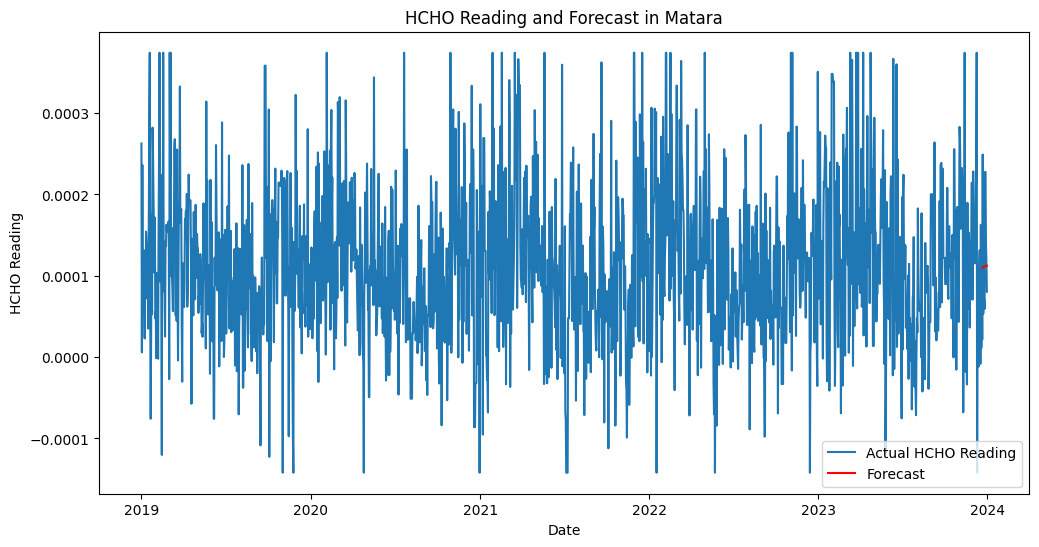

In [92]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(matara_ds, label='Actual HCHO Reading')
plt.plot(matara_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in Matara')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [93]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(matara_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 5.786726601361884e-09


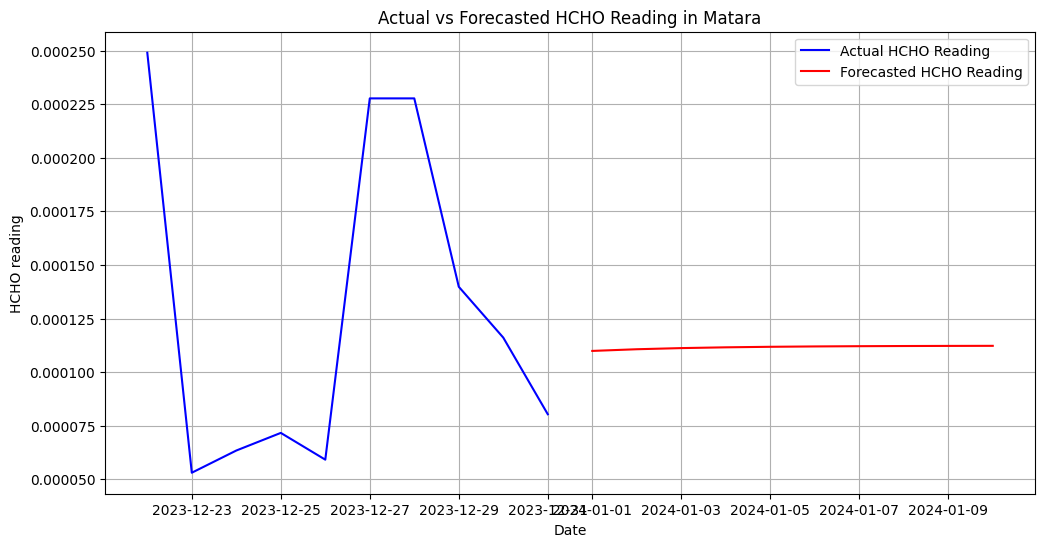

In [94]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(matara_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in Matara')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Jaffna Proper

In [95]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Jaffna Proper']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -9.944687024826672
p-value: 2.6084043786381528e-17


In [96]:
jaffna_ds = concatenated_df[concatenated_df['Location'] == 'Jaffna Proper']['HCHO reading']

In [97]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(jaffna_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14779.503
Date:                Sat, 20 Apr 2024   AIC                         -29551.006
Time:                        23:49:54   BIC                         -29528.967
Sample:                    01-01-2019   HQIC                        -29542.877
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.36e-06     46.575      0.000       0.000       0.000
ar.L1          0.3686    3.1e-11   1.19e+10      0.000       0.369       0.369
ma.L1         -0.1645   2.82e-11  -5.84e+09      0.000      -0.164      -0.164
sigma2       5.46e-09   1.72e-10     31.721      0.000    5.12e-09     5.8e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                82.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.39
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.79e+26. Standard errors may be unstable.
"""

In [98]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000101
2024-01-02    0.000106
2024-01-03    0.000109
2024-01-04    0.000109
2024-01-05    0.000110
2024-01-06    0.000110
2024-01-07    0.000110
2024-01-08    0.000110
2024-01-09    0.000110
2024-01-10    0.000110
Freq: D, Name: predicted_mean, dtype: float64

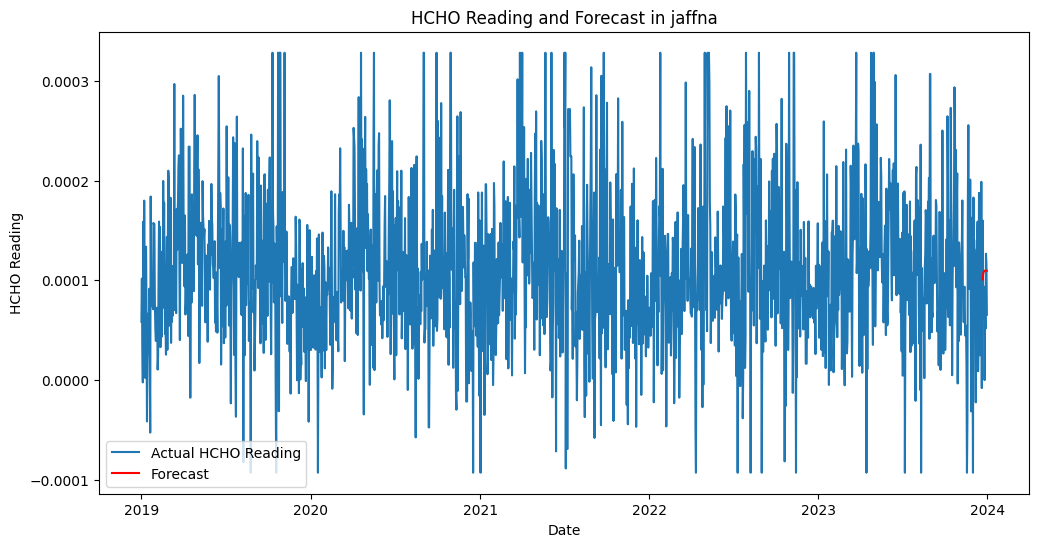

In [99]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(jaffna_ds, label='Actual HCHO Reading')
plt.plot(jaffna_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in jaffna')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [100]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(jaffna_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.493203442867045e-09


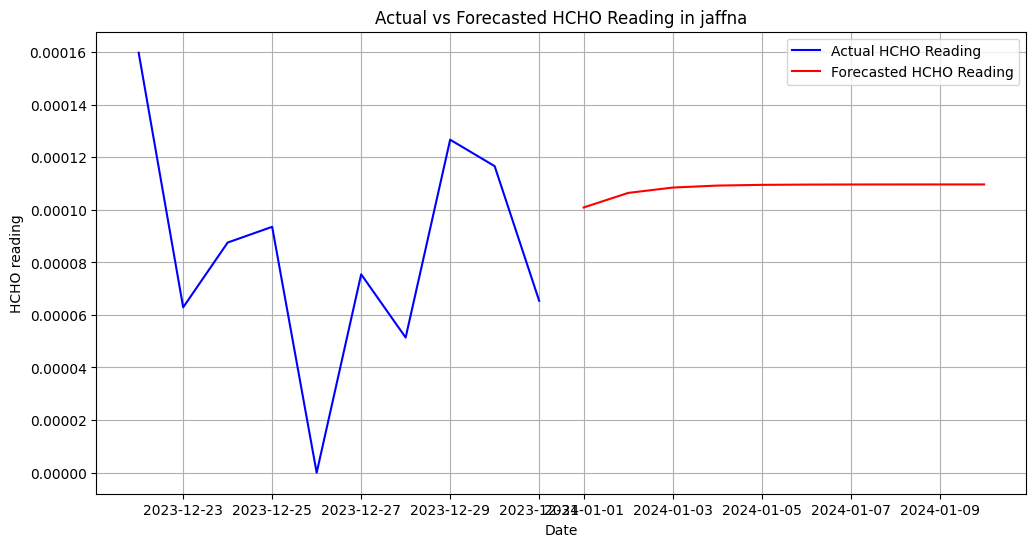

In [101]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(jaffna_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in jaffna')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Nuwara Eliya Proper

In [102]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Nuwara Eliya Proper']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -20.112650642224786
p-value: 0.0


In [103]:
nuwara_eliya_ds = concatenated_df[concatenated_df['Location'] == 'Nuwara Eliya Proper']['HCHO reading']

In [104]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(nuwara_eliya_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14399.693
Date:                Sat, 20 Apr 2024   AIC                         -28791.387
Time:                        23:49:55   BIC                         -28769.347
Sample:                    01-01-2019   HQIC                        -28783.257
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.02e-06     34.372      0.000    9.79e-05       0.000
ar.L1          0.4656   3.22e-11   1.45e+10      0.000       0.466       0.466
ma.L1         -0.2541   2.94e-11  -8.64e+09      0.000      -0.254      -0.254
sigma2      8.271e-09   2.65e-10     31.195      0.000    7.75e-09    8.79e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                33.73
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.28
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.17e+25. Standard errors may be unstable.
"""

In [105]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000101
2024-01-02    0.000102
2024-01-03    0.000103
2024-01-04    0.000103
2024-01-05    0.000104
2024-01-06    0.000104
2024-01-07    0.000104
2024-01-08    0.000104
2024-01-09    0.000104
2024-01-10    0.000104
Freq: D, Name: predicted_mean, dtype: float64

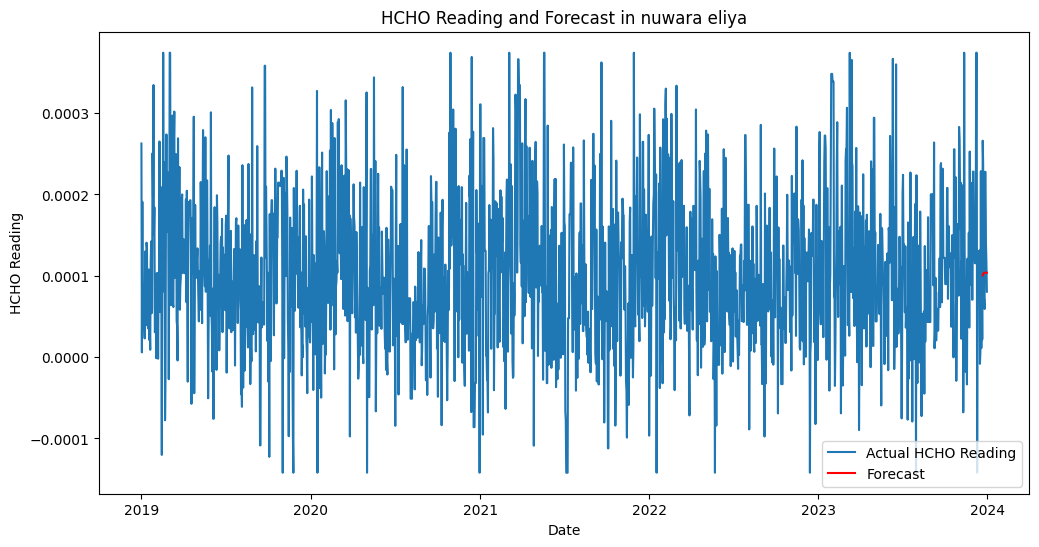

In [106]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(nuwara_eliya_ds, label='Actual HCHO Reading')
plt.plot(nuwara_eliya_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in nuwara eliya')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [107]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(nuwara_eliya_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 8.28597175703663e-09


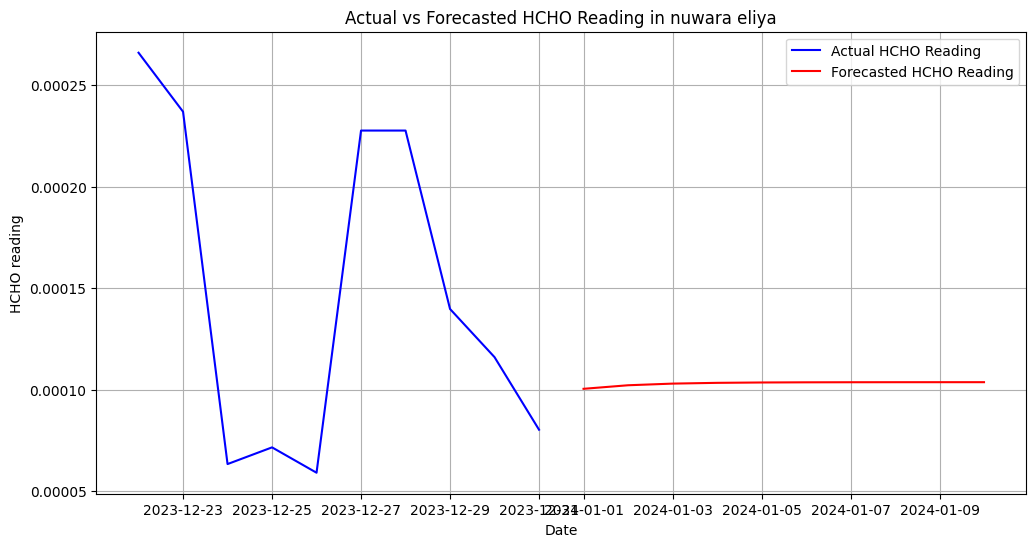

In [108]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nuwara_eliya_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in nuwara eliya')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()

# Kandy Proper

In [109]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Kandy Proper']['HCHO reading'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -8.496931388143931
p-value: 1.2684624706916115e-13


In [110]:
kandy_ds = concatenated_df[concatenated_df['Location'] == 'Kandy Proper']['HCHO reading']

In [111]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(kandy_ds, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO reading   No. Observations:                 1825
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14802.826
Date:                Sat, 20 Apr 2024   AIC                         -29597.651
Time:                        23:49:56   BIC                         -29575.614
Sample:                    01-02-2019   HQIC                        -29589.522
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.825e-05   4.22e-06     23.302      0.000       9e-05       0.000
ar.L1          0.6411   3.83e-11   1.67e+10      0.000       0.641       0.641
ma.L1         -0.1113   1.86e-11  -5.97e+09      0.000      -0.111      -0.111
sigma2      5.275e-09   1.38e-10     38.346      0.000    5.01e-09    5.54e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               241.52
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+28. Standard errors may be unstable.
"""

In [112]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000073
2024-01-02    0.000082
2024-01-03    0.000088
2024-01-04    0.000092
2024-01-05    0.000094
2024-01-06    0.000096
2024-01-07    0.000096
2024-01-08    0.000097
2024-01-09    0.000098
2024-01-10    0.000098
Freq: D, Name: predicted_mean, dtype: float64

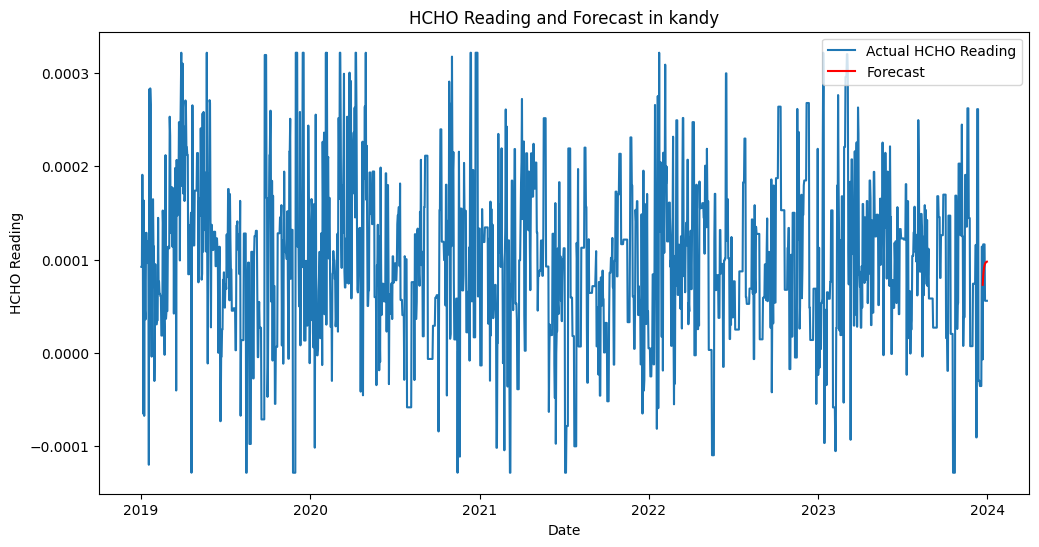

In [113]:
from sklearn.metrics import mean_squared_error

# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(kandy_ds, label='Actual HCHO Reading')
plt.plot(kandy_ds.index[-10:], forecast, label='Forecast', color='red')
plt.title('HCHO Reading and Forecast in kandy')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()

In [114]:
# Calculate and print model performance metrics
# Calculate mean squared error
mse = mean_squared_error(kandy_ds[-10:], forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.7878452330061872e-09


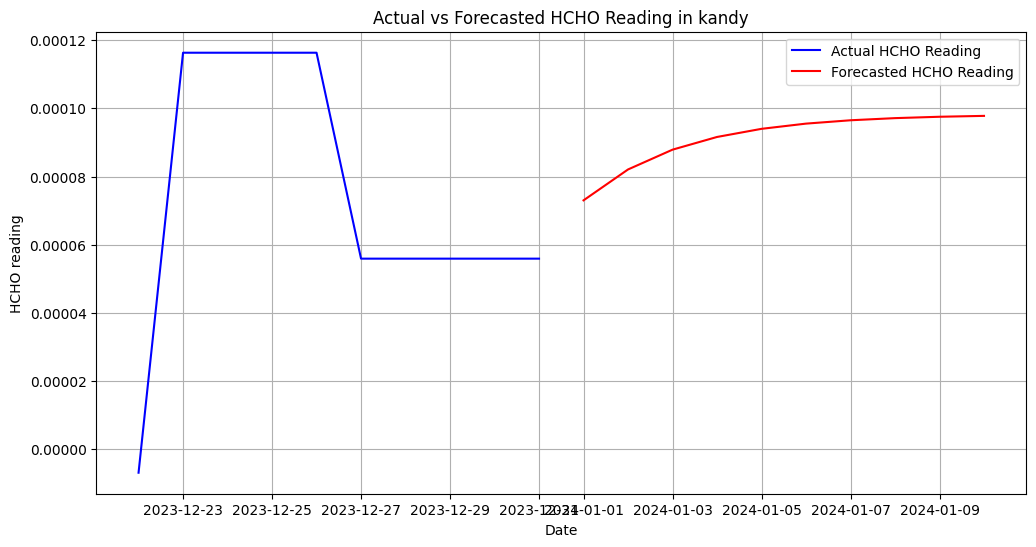

In [115]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(kandy_ds[-10:], label='Actual HCHO Reading', color='blue')
plt.plot(forecast, label='Forecasted HCHO Reading', color='red')
plt.title('Actual vs Forecasted HCHO Reading in kandy')
plt.xlabel('Date')
plt.ylabel('HCHO reading')
plt.grid(True)
plt.legend()
plt.show()